In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.metrics import r2_score, mean_squared_error


In [44]:
df=pd.read_excel('waste_management_India_clean.xlsx')
print(df.head())

  City/District Waste_Type  Waste_Generated(Tons/Day)  Recycling_Rate(%)  \
0        Mumbai    Plastic                       6610                 68   
1        Mumbai    Plastic                       7456                 73   
2        Mumbai    Plastic                       6932                 81   
3        Mumbai    Plastic                       2501                 41   
4        Mumbai    Plastic                       6569                 48   

   Population_Density(People/km²)  Municipal_Efficiency_Score(1-10)  \
0                           11191                                 9   
1                           11191                                 9   
2                           11191                                10   
3                           11191                                 9   
4                           11191                                 5   

  Disposal_Method  Cost_of_Waste_Management(₹/Ton)  Awareness_Campaigns_Count  \
0      Composting                  

In [46]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 850 entries, 0 to 849
Data columns (total 13 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   City/District                     850 non-null    object
 1   Waste_Type                        850 non-null    object
 2   Waste_Generated(Tons/Day)         850 non-null    int64 
 3   Recycling_Rate(%)                 850 non-null    int64 
 4   Population_Density(People/km²)    850 non-null    int64 
 5   Municipal_Efficiency_Score(1-10)  850 non-null    int64 
 6   Disposal_Method                   850 non-null    object
 7   Cost_of_Waste_Management(₹/Ton)   850 non-null    int64 
 8   Awareness_Campaigns_Count         850 non-null    int64 
 9   Landfill_Name                     850 non-null    object
 10  Landfill_Location(Lat, Long)      850 non-null    object
 11  Landfill_Capacity(Tons)           850 non-null    int64 
 12  Year                  

In [50]:
df.dropna(inplace=True)
df.drop_duplicates(inplace=True)
df.isnull().sum()
Q1=df['Recycling_Rate(%)'].quantile(0.25)
Q3=df['Recycling_Rate(%)'].quantile(0.75)
IQR=Q3-Q1
lower_bound=Q1-1.5*IQR
upper_bound=Q3+1.5*IQR
outliers=(df['Recycling_Rate(%)']<lower_bound)|(df['Recycling_Rate(%)']>upper_bound)
clean_waste_management=df.loc[~outliers].reset_index(drop=True)
print(len(clean_waste_management))
print(clean_waste_management)

850
    City/District Waste_Type  Waste_Generated(Tons/Day)  Recycling_Rate(%)  \
0          Mumbai    Plastic                       6610                 68   
1          Mumbai    Plastic                       7456                 73   
2          Mumbai    Plastic                       6932                 81   
3          Mumbai    Plastic                       2501                 41   
4          Mumbai    Plastic                       6569                 48   
..            ...        ...                        ...                ...   
845       Gwalior  Hazardous                       3629                 34   
846       Gwalior  Hazardous                       1827                 49   
847       Gwalior  Hazardous                       1014                 51   
848       Gwalior  Hazardous                       4272                 41   
849       Gwalior  Hazardous                       2480                 58   

     Population_Density(People/km²)  Municipal_Efficiency_S

In [52]:
print(clean_waste_management.isnull().sum())

City/District                       0
Waste_Type                          0
Waste_Generated(Tons/Day)           0
Recycling_Rate(%)                   0
Population_Density(People/km²)      0
Municipal_Efficiency_Score(1-10)    0
Disposal_Method                     0
Cost_of_Waste_Management(₹/Ton)     0
Awareness_Campaigns_Count           0
Landfill_Name                       0
Landfill_Location(Lat, Long)        0
Landfill_Capacity(Tons)             0
Year                                0
dtype: int64


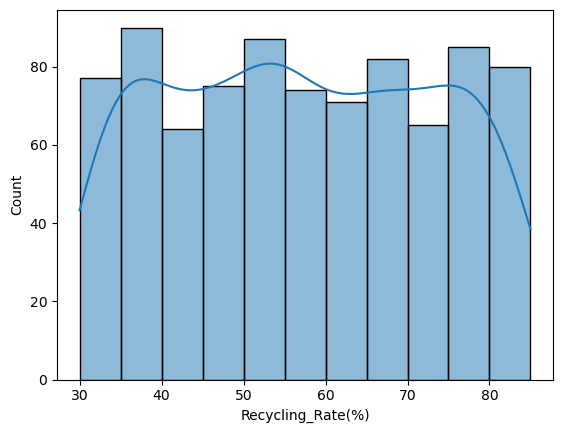

In [54]:
sns.histplot(clean_waste_management['Recycling_Rate(%)'], kde=True)
plt.show()

In [56]:
# Ensure column names are properly formatted
df.columns = df.columns.str.strip()

# Check for missing values and fill for numeric columns
numeric_cols = df.select_dtypes(include=[np.number]).columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].median())

# Define the target variable and predictors
target = "Recycling_Rate(%)"
features = [
    "Waste_Generated(Tons/Day)",
    "Population_Density(People/km²)",
    "Municipal_Efficiency_Score(1-10)",
    "Cost_of_Waste_Management(₹/Ton)",
    "Awareness_Campaigns_Count",
    "Landfill_Capacity(Tons)",
    "Disposal_Method",
    "Year"
]

# Ensure 'Disposal_Method' exists in the DataFrame
if "Disposal_Method" not in df.columns:
    raise KeyError("'Disposal_Method' column is missing from the dataset!")

X = df[features]
y = df[target]

# Define categorical and numerical features
categorical_features = ["Disposal_Method"]
numeric_features = [col for col in features if col not in categorical_features]

# Preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', numeric_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ]
)

# Define the machine learning pipeline
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(n_estimators=100, random_state=42))
])

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
pipeline.fit(X_train, y_train)

# Make predictions
y_pred = pipeline.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R² Score:", r2)

Mean Squared Error: 300.0441870588235
R² Score: -0.08281746898034958


In [58]:
# Define the new target variable based on efficiency aspects
# We use Recycling Rate as a proxy for Waste Management Efficiency
target = "Recycling_Rate(%)"

# Define the updated feature set based on AI-related waste management efficiency factors
features = ["Waste_Generated(Tons/Day)", "Population_Density(People/km²)", 
            "Municipal_Efficiency_Score(1-10)", "Cost_of_Waste_Management(₹/Ton)", 
            "Awareness_Campaigns_Count"]

# Dropping rows with missing values for clean data processing
df_cleaned = df.dropna(subset=features + [target])

# Splitting data into training and testing sets (80% train, 20% test)
X = df_cleaned[features]
y = df_cleaned[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluating the model performance
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Output results
regression_results = {
    "MAE": mae,
    "MSE": mse,
    "R2_Score": r2,
    "Coefficients": model.coef_,
    "Intercept": model.intercept_
}

regression_results


{'MAE': 14.52394535368786,
 'MSE': 276.0650775182356,
 'R2_Score': 0.0037197806016645574,
 'Coefficients': array([-4.89019866e-05, -5.82658145e-05, -1.96381816e-01,  3.15358491e-04,
        -5.87324478e-02]),
 'Intercept': 59.298617267945936}